### Scala's real-world project repository data

<p>With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.</p>
<p>Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available. </p>
<p>We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.</p>
<p>The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:</p>
<ol>
<li><code>pulls_2011-2013.csv</code> contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.</li>
<li><code>pulls_2014-2018.csv</code> contains identical information, and spans from 2014 up to 2018.</li>
<li><code>pull_files.csv</code> contains the files that were modified by each pull request.</li>
</ol>

### Exploring the dataframes

In [35]:
#import datasets do pandas dataframes
import pandas as pd

pulls_files = pd.read_csv('https://raw.githubusercontent.com/Gbofrc/The-GitHub-History-of-the-Scala-Language/main/pull_files.csv')
pulls_2011 = pd.read_csv('https://raw.githubusercontent.com/Gbofrc/The-GitHub-History-of-the-Scala-Language/main/pulls_2011-2013.csv')
pulls_2014 = pd.read_csv('https://raw.githubusercontent.com/Gbofrc/The-GitHub-History-of-the-Scala-Language/main/pulls_2014-2018.csv')

In [36]:
#check some lines of each dataframe

pulls_files.head(3)

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala


In [37]:
pulls_2011.head(3)

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z


In [38]:
pulls_2014.head(3)

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z


In [39]:
# dataframes columns

print(pulls_files.columns, '\n')
print(pulls_2011.columns, '\n')
print(pulls_2014.columns, '\n')

Index(['pid', 'file'], dtype='object') 

Index(['pid', 'user', 'date'], dtype='object') 

Index(['pid', 'user', 'date'], dtype='object') 



In [40]:
# dataframes shapes

print(pulls_files.shape, '\n')
print(pulls_2011.shape, '\n')
print(pulls_2014.shape, '\n')

(85588, 2) 

(3296, 3) 

(2904, 3) 



In [41]:
# dataframes info (are there any missing values?)

print(pulls_files.info(), '\n')
print(pulls_2011.info(), '\n')
print(pulls_2014.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     3296 non-null   int64 
 1   user    3296 non-null   object
 2   date    3296 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     2904 non-null   int64 
 1   user    2904 non-null   object
 2   date    2904 non-null   object
dtypes: int64(1), object(2)
memory usage: 68.2+ KB
None 



In [42]:
# append dataframes

pulls = pulls_2011.append(pulls_2014)

In [43]:
# shape of the appended dataframe

pulls.shape

(6200, 3)

In [44]:
# sample of the appended dataframe

pulls.head(3)

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z


In [45]:
# dealing with the date column

pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

pulls.head(3)

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00


In [46]:
# merge pulls and pull_files

data = pulls.merge(pulls_files, on='pid')

data.head(3)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check


In [47]:
# check size of merged dataframe

print(data.shape, '\n')

(85588, 4) 



In [48]:
data.head(3)

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check


### Is the project still actively maintained?
<p>The activity in an open source project is not very consistent. Some projects might be active for many years after the initial release, while others can slowly taper out into oblivion. Before committing to contributing to a project, it is important to understand the state of the project. Is development going steadily, or is there a drop? Has the project been abandoned altogether?</p>
<p>The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.</p>
<p>For Scala, we will do this by plotting a chart of the project's activity. We will calculate the number of pull requests submitted each (calendar) month during the project's lifetime. We will then plot these numbers to see the trend of contributions.</p>

In [67]:
# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

data.head(3)

,pid,user,date,file,month,year
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,12,2013
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,12,2013
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,12,2013


In [64]:
# Group by the month and year and count the pull requests
counts = data.groupby(['month', 'year'])['pid'].count()

counts

month  year
1      2012     489
       2013    3717
       2014    1140
       2015     732
       2016     640
               ... 
12     2013    1692
       2014    1001
       2015     616
       2016     468
       2017     224
Name: pid, Length: 74, dtype: int64

<AxesSubplot:xlabel='month,year'>

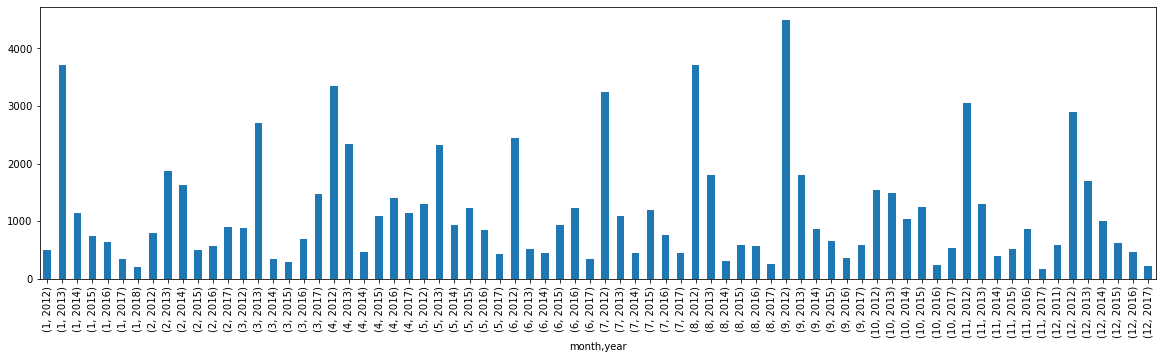

In [51]:
%matplotlib inline

# Plot the results
counts.plot(kind='bar', figsize = (20,5))

### Is there camaraderie in the project?
<p>The organizational structure varies from one project to another, and it can influence your success as a contributor. A project that has a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors, including a community that is reluctant to accept pull requests from "outsiders," that the code base is hard to work with, etc. However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.</p>
<p>In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors. </p>

In [72]:
# Group by the submitter
by_user = data.groupby('user').agg({'pid': 'count'})

by_user.sort_values(by='pid', ascending=False)

,pid
user,
xeno-by,12649
retronym,11430
paulp,11260
adriaanm,7722
lrytz,6988
...,...
iliffwes,1
jaceklaskowski,1
jacobsallan,1


array([[<AxesSubplot:title={'center':'pid'}>]], dtype=object)

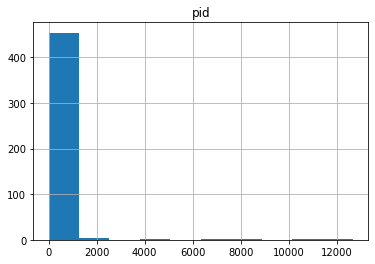

In [53]:
# Plot the histogram
by_user.hist()

### What files were changed in the last ten pull requests?
<p>Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. Therefore it is important to understand the parts of the system that have been recently changed. This allows us to pinpoint the "hot" areas of the code where most of the activity is happening. Focusing on those parts might not the most effective use of our times.</p>

In [54]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by = 'date').tail(10)
last_10

,pid,user,date
9,162011899,joroKr21,2018-01-10 00:45:57+00:00
8,162197834,SethTisue,2018-01-10 18:31:25+00:00
7,162256029,mkeskells,2018-01-10 23:20:03+00:00
6,162643301,hrhino,2018-01-12 14:29:49+00:00
5,162765232,howtonotwin,2018-01-13 04:37:17+00:00
4,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3,162985594,lrytz,2018-01-15 15:52:39+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
0,163314316,hrhino,2018-01-16 23:29:16+00:00


In [55]:
# Join the two data sets
joined_pr = pulls_files.merge(last_10, on='pid')
joined_pr

,pid,file,user,date
0,163314316,test/files/pos/t5638/Among.java,hrhino,2018-01-16 23:29:16+00:00
1,163314316,test/files/pos/t5638/Usage.scala,hrhino,2018-01-16 23:29:16+00:00
2,163314316,test/files/pos/t9291.scala,hrhino,2018-01-16 23:29:16+00:00
3,163314316,test/files/run/t8348.check,hrhino,2018-01-16 23:29:16+00:00
4,163314316,test/files/run/t8348/TableColumn.java,hrhino,2018-01-16 23:29:16+00:00
5,163314316,test/files/run/t8348/TableColumnImpl.java,hrhino,2018-01-16 23:29:16+00:00
6,163314316,test/files/run/t8348/Test.scala,hrhino,2018-01-16 23:29:16+00:00
7,163061502,src/library/scala/concurrent/Lock.scala,joroKr21,2018-01-15 23:44:52+00:00
8,163057333,src/compiler/scala/tools/nsc/profile/AsyncHelp...,mkeskells,2018-01-15 23:05:06+00:00
9,163057333,src/compiler/scala/tools/nsc/profile/Profiler....,mkeskells,2018-01-15 23:05:06+00:00


In [56]:
# Identify the unique files
files = set(joined_pr['file'])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

### Who made the most pull requests to a given file?
<p>When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.</p>
<p>We identified <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code> as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.</p>

In [57]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the pull requests that changed the file
file_pr = data[data['file'] == file]

file_pr

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
14970,4786005,starblood,2013-03-25 02:48:48+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,3,2013
17127,4295399,retronym,2013-02-24 21:43:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
19174,3918789,gkossakowski,2013-01-31 00:43:19+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013
19834,3854688,melloc,2013-01-26 22:47:32+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,1,2013


In [58]:
# Count the number of changes made by each developer
author_counts = file_pr.groupby('user').count()

author_counts

,pid,date,file,month,year
user,,,,,
bjornregnell,1,1,1,1,1
densh,1,1,1,1,1
gkossakowski,1,1,1,1,1
melloc,1,1,1,1,1
odersky,2,2,2,2,2
paulp,2,2,2,2,2
retronym,5,5,5,5,5
soc,4,4,4,4,4
starblood,1,1,1,1,1


In [59]:
# Print the top 3 developers
author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


### Who made the last ten pull requests on a given file?
<p>Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable <em>and</em> still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system. </p>
<p>Like in the previous task, we will look at the history of  <code>src/compiler/scala/reflect/reify/phases/Calculate.scala</code>.</p>

In [60]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pulls_files[pulls_files['file'] == file]

file_pr.head(3)

,pid,file
13,162838837,src/compiler/scala/reflect/reify/phases/Calcul...
26951,22845163,src/compiler/scala/reflect/reify/phases/Calcul...
32753,12102550,src/compiler/scala/reflect/reify/phases/Calcul...


In [61]:
# Merge the obtained results with the pulls DataFrame
joined_pr = pulls.merge(file_pr, on='pid')

joined_pr.head(3)

,pid,user,date,file
0,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
1,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...
2,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...


In [62]:
# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

### The pull requests of two special developers
<p>Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.</p>

<AxesSubplot:xlabel='date'>

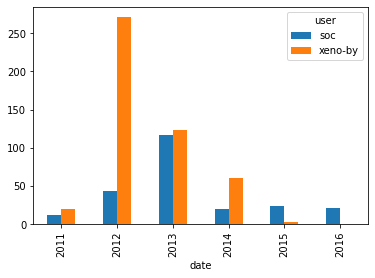

In [63]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind='bar')

### Visualizing the contributions of each developer
<p>As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.). In our case, we want to see which of our two developers of interest have the most experience with the code in a given file. We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.</p>

<AxesSubplot:xlabel='date'>

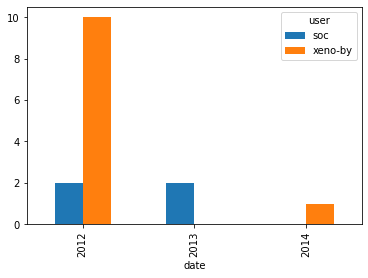

In [73]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Merge DataFrames and select the pull requests by the author
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file'] == file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')